In [85]:
left_sine_wave = "./sine_test_left_favored.wav"

In [86]:
import wave

#get metadata about the wave file
with wave.open(left_sine_wave, 'r') as file:
    params = file.getparams()

print("params: ", params)

params:  _wave_params(nchannels=2, sampwidth=3, framerate=44100, nframes=165375, comptype='NONE', compname='not compressed')


In [87]:
from scipy.io import wavfile

# srate: sample rate
# data: array of amplitudes
srate, data = wavfile.read(left_sine_wave)  #A 880Hz panned to the left
data # tuples LR, amplitude in range [-2147483648, +2147483392] from https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

array([[        0,         0],
       [   470784,    151552],
       [  2248704,    724480],
       ...,
       [-40287744, -12979456],
       [-28155904,  -9070848],
       [-15582464,  -5020160]])

In [88]:
import numpy as np

# refactor the data from a 2 dimensional array to numpy 1-D arrays of amplitudes in right and left channels
left = np.apply_along_axis(lambda x: x[0], 1, data)
right = np.apply_along_axis(lambda x: x[1], 1, data)

'''
could we also do:
left = data[:, 0]
right = data[:, 1]
'''

'\ncould we also do:\nleft = data[:, 0]\nright = data[:, 1]\n'

In [89]:
from numpy import fft

data_fft = fft.fft(left)

freqs = fft.fftfreq(left.size, 1/srate)

freqs[0:20]

array([0.        , 0.26666667, 0.53333333, 0.8       , 1.06666667,
       1.33333333, 1.6       , 1.86666667, 2.13333333, 2.4       ,
       2.66666667, 2.93333333, 3.2       , 3.46666667, 3.73333333,
       4.        , 4.26666667, 4.53333333, 4.8       , 5.06666667])

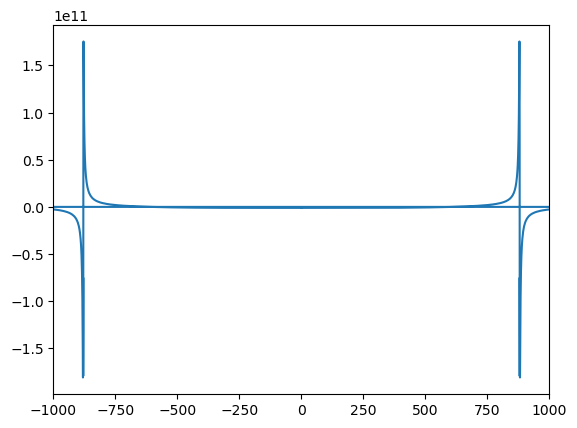

In [90]:
# really helpful fft info: https://stackoverflow.com/questions/59979354/what-is-the-difference-between-numpy-fft-fft-and-numpy-fft-fftfreq#59990769

import matplotlib.pyplot as plt

plt.xlim([-1000, 1000])
plt.plot(freqs, data_fft.real, label="Real")

In [91]:
import os

clean_speech_dir = "./MS-SNSD/CleanSpeech_training/"
clean_speech = os.listdir(clean_speech_dir)

noise_dir = "./MS-SNSD/Noise_training/"
noise = os.listdir(noise_dir)

noisy_speech_dir = "./MS-SNSD/NoisySpeech_training/"
noisy_speech = os.listdir(noisy_speech_dir)

len(clean_speech), len(noise), len(noisy_speech)

(63, 315, 315)

In [92]:
import pandas as pd

df = pd.DataFrame()

In [94]:
import torch

num_seconds = 10

srate, data = wavfile.read(noisy_speech_dir + noisy_speech[0])
X = torch.empty((len(noisy_speech) + len(clean_speech), srate*num_seconds))

In [95]:
for i in range(0, len(noisy_speech)):
    srate, data = wavfile.read(noisy_speech_dir + noisy_speech[i])
    data = data[:srate*10]
    X[i] = torch.tensor(data)

    i += 1
X

tensor([[-219., -340., -306.,  ..., 1371., 4009., 2434.],
        [-197., -307., -273.,  ...,  771., 2254., 1369.],
        [-185., -288., -255.,  ...,  433., 1267.,  769.],
        ...,
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.],
        [   0.,    0.,    0.,  ...,    0.,    0.,    0.]])

In [96]:
for i in range(len(noisy_speech), len(noisy_speech) + len(clean_speech)): 
    # can grab more from just the clean_train folder, but right now I'm just grabbing what formed the training data
    srate, data = wavfile.read(clean_speech_dir + clean_speech[i - len(noisy_speech)])
    data = data[:srate*10]
    X[i] = torch.tensor(data) 

    i += 1
X

tensor([[-219., -340., -306.,  ..., 1371., 4009., 2434.],
        [-197., -307., -273.,  ...,  771., 2254., 1369.],
        [-185., -288., -255.,  ...,  433., 1267.,  769.],
        ...,
        [-245., -387., -332.,  ..., -474., -647., -874.],
        [  86.,  140.,  124.,  ...,  435.,  439.,  433.],
        [-179., -333., -292.,  ...,  532.,  469.,  569.]])

In [109]:
y = torch.empty((len(noisy_speech) + len(clean_speech), 1))

In [116]:
for i in range(0, y.shape[0]):
    y[i] = 1 if i < len(noisy_speech) else 0

In [118]:
y

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [99]:
# Could then change X to have a row size of 2*srate*num_seconds (or just not include time-domain information) and add a FFT row for each sample

# Data Analysis

